## This notebook contains the data exploration and visualization of the data

## Business Understanding

The route between Zandvoort and Overveen is a route with quite a lot of day travelers, because of the beach at Zandvoort. This would suggest more travelers on hot summer days. When it is already hot outside it would not be ideal to be in a very crowded (hot) train. To give these travelers an option to travel with a slightly less crowded train we like to predict the crowd level of the train. Such that we can communicate this with the traveler as an indication of how crowdy the train is.

## Question of interest

How crowdy are the trains

## Data Understanding

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

## Assess data

In [2]:
# Load data and show first 5 rows
df_classification = pd.read_excel('data/classificatie_OVV_ZVT.xlsx')
df_weather = pd.read_excel('data/openWeather20210705_20211001.xlsx')
print('First 5 rows of the classification dataframe:')
print(df_classification.head())
print('---------------------------')
print('First five rows of the weather dataframe:')
print(df_weather.head())

First 5 rows of the classification dataframe:
   ritnummer verkeersdatum_ams  vertrekstationUicCode  aankomststationUicCode  \
0       5416        2021-07-05                8400733                 8400501   
1       5441        2021-07-05                8400501                 8400733   
2       5447        2021-07-05                8400501                 8400733   
3       5448        2021-07-05                8400733                 8400501   
4       5450        2021-07-05                8400733                 8400501   

  aankomststationVerkorting vertrekstationVerkorting  classificatie  \
0                       OVN                      ZVT              1   
1                       ZVT                      OVN              1   
2                       ZVT                      OVN              1   
3                       OVN                      ZVT              1   
4                       OVN                      ZVT              1   

         materieeltype             vertr

## Explore data

### Classification dataset

In [3]:
shape_df = df_classification.shape
columns_nan = set(df_classification.columns[df_classification.isnull().mean()!=0])
number_columns_nan = len(columns_nan)
df_dtypes = df_classification.dtypes
count_classification = df_classification['classificatie'].value_counts()
df_years = df_classification['verkeersdatum_ams'].dt.year.unique()
df_months = df_classification['verkeersdatum_ams'].dt.month.unique()
stations_arrival = df_classification['aankomststationVerkorting'].unique()
stations_departure = df_classification['vertrekstationVerkorting'].unique()

In [4]:
print('Number of rows:', shape_df[0], 'number of columns:', shape_df[1])
print('columns with NaN values:', columns_nan, ', number of columns', number_columns_nan)
print('The dtypes of the columns:')
print(df_dtypes)
print('The unique classification types with there number of occurrences:')
print(count_classification)
print('Unique years:', df_years)
print('Unique months:', df_months)
print('Arrival stations:', stations_arrival)
print('Departure station', stations_departure)

Number of rows: 9667 number of columns: 10
columns with NaN values: set() , number of columns 0
The dtypes of the columns:
ritnummer                             int64
verkeersdatum_ams            datetime64[ns]
vertrekstationUicCode                 int64
aankomststationUicCode                int64
aankomststationVerkorting            object
vertrekstationVerkorting             object
classificatie                         int64
materieeltype                        object
vertrekmoment_utc                    object
aankomstmoment_utc                   object
dtype: object
The unique classification types with there number of occurrences:
1    9337
2     223
3     107
Name: classificatie, dtype: int64
Unique years: [2021]
Unique months: [7 8 9]
Arrival stations: ['OVN' 'ZVT']
Departure station ['ZVT' 'OVN']


## Observations

- There are no columns with NaN values, which means the dataset does not contain NaNs.
- The presence of classification 1 in the dataset is high.
- Dataset contains the months July, August and September of 2021
- The dataset contains OVN (Overveen) and ZVT (Zandvoort) as arrival and departure stations

## Data visualization

Text(0.5, 1.0, 'Count of each classification')

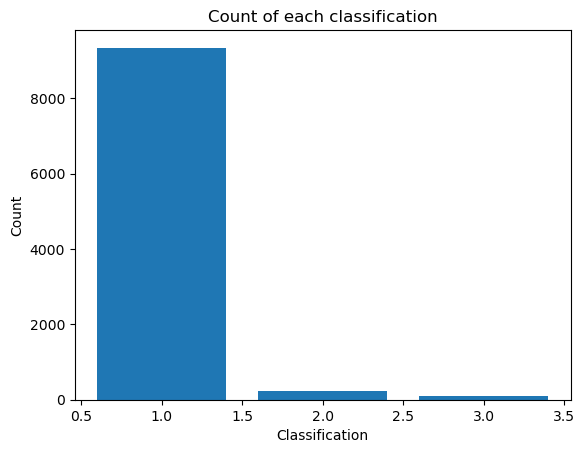

In [5]:
# Plot classification
plt.bar(count_classification.index, count_classification.values)
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title('Count of each classification')

## Observations

- The presence of classification 1 in the dataset is by far the highest.

### Weather dataset

In [26]:
shape_df = df_weather.shape
columns_nan = set(df_weather.columns[df_weather.isnull().mean()!=0])
number_columns_nan = len(columns_nan)
df_dtypes = df_weather.dtypes
df_weather['forecast dt iso'] = pd.to_datetime(df_weather['forecast dt iso'], format='%Y-%m-%d %H:%M:%S %z UTC')
df_years = df_weather['forecast dt iso'].dt.year.unique()
df_months = df_weather['forecast dt iso'].dt.month.unique()
min_rain = df_weather['rain'].min()
max_rain = df_weather['rain'].max()
min_temperature = df_weather['temperature'].min()
max_temperature = df_weather['temperature'].max()


In [27]:
print('Number of rows:', shape_df[0], 'number of columns:', shape_df[1])
print('columns with NaN values:', columns_nan, ', number of columns', number_columns_nan)
print('The dtypes of the columns:')
print(df_dtypes)
print('Unique years:', df_years)
print('Unique months:', df_months)
print('minimum rainfall is:', min_rain, 'and the maximum rainfall is:', max_rain)
print('minimum temperature is:', min_temperature, 'and the maximum temperature is:', max_temperature)

Number of rows: 135520 number of columns: 24
columns with NaN values: set() , number of columns 0
The dtypes of the columns:
forecast dt unixtime                  int64
forecast dt iso         datetime64[ns, UTC]
slice dt unixtime                     int64
slice dt iso                         object
lat                                 float64
lon                                 float64
temperature                         float64
dew_point                           float64
pressure                            float64
ground_pressure                     float64
humidity                            float64
clouds                                int64
wind_speed                          float64
wind_deg                            float64
rain                                float64
snow                                  int64
ice                                   int64
fr_rain                               int64
convective                          float64
snow_depth                            i

## Observation

- There are no columns with NaN values, which means the dataset does not contain NaNs.
- Dataset contains the months July, August and September of 2021
- Forecast dates are objects not datetime
- Rain and Temperature minimum and maximum look logical

## Data visualization

In [36]:
df_weather = df_weather.groupby('forecast dt iso').mean()

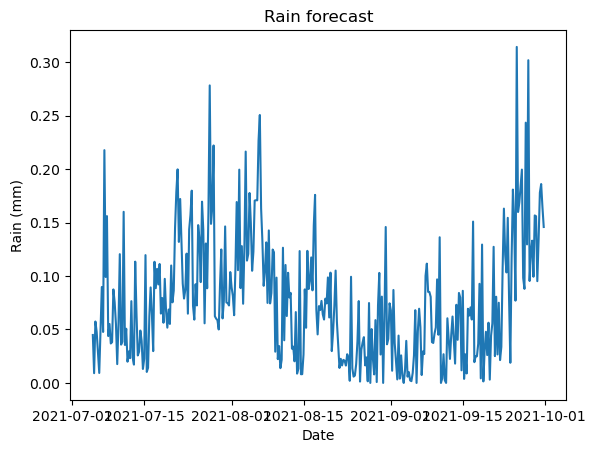

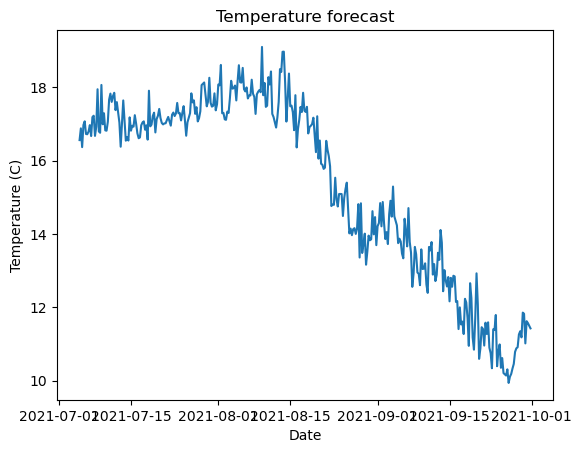

In [40]:
plt.plot(df_weather['rain'])
plt.ylabel('Rain (mm)')
plt.xlabel('Date')
plt.title('Rain forecast')
plt.show()
plt.plot(df_weather['temperature'])
plt.ylabel('Temperature (C)')
plt.xlabel('Date')
plt.title('Temperature forecast')
plt.show()